<a href="https://colab.research.google.com/github/Yuma-Ichikawa/boltzmann_machine/blob/main/Boltzmann_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boltzmann Machineの実装

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['image.cmap']='gray'

## 簡単なパターンを作成

In [ ]:
sub_mat1 = np.zeros((5, 15))
sub_mat2 = np.zeros((15, 5))
sub_mat3 = np.ones((5, 15))
sub_mat4 = np.ones((15, 5))
sub_mat5 = np.zeros((5, 5))
sub_mat6 = np.ones((5, 5))
sub_mat7 = np.concatenate([sub_mat6, sub_mat5, sub_mat5], axis=1)
sub_mat8 = np.concatenate([sub_mat5, sub_mat6, sub_mat5], axis=1)
sub_mat9 = np.concatenate([sub_mat5, sub_mat5, sub_mat6], axis=1)

# 各画像データを作成
data1 = np.concatenate([sub_mat1, sub_mat3, sub_mat1],axis=0)
data2 = np.concatenate([sub_mat2,sub_mat4,sub_mat2],axis=1)
data3 = np.concatenate([sub_mat1, sub_mat8, sub_mat1], axis=0)
data4 = np.concatenate([sub_mat7, sub_mat8, sub_mat9], axis=0)
data5 = np.concatenate([sub_mat9, sub_mat8, sub_mat7], axis=0) 

# 一次元配列に変換
data1_1d = data1.ravel()
data2_1d = data2.ravel()
data3_1d = data3.ravel()
data4_1d = data4.ravel()
data5_1d = data5.ravel()

# Datasetを作成
sub_data = np.array([data1_1d, data2_1d, data3_1d, data4_1d, data5_1d])
data = np.tile(sub_data, (300, 1))

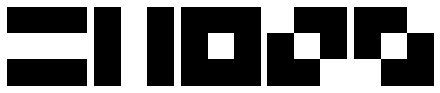

225


In [ ]:
# sampleデータセットを表示
fig, axis = plt.subplots(1, 5, constrained_layout=True)
for i in range(5):
    axis[i].imshow(data[i].reshape(15, -1))
    axis[i].axis('off')
plt.show()
print(15*15)

In [ ]:
class BM:
    def __init__(self, learning_rate=0.1, n_iter=10, verbose=0, random_state=None):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.verbose = verbose
        self.random_state = random_state
        self.w = np.random.normal(loc=0.0, scale=0.1, size=(15,15))
        self.b = np.zeros(15)

    def sigmoid_belife(self, x, i=0):
        p = np.sum(np.dot(self.w[i], x.T) - (self.w[i, i]*x[i]))
        p += self.b[i]
        p = self.sigmoid(p)
        return p

    def gibbs(self, x, gibbs_step=10):
        x = x.copy()
        for j in range(15):
            p = self.sigmoid_belife(x, i=j)
            x[i] = np.random.binomial(1, p)
        return x

    def sigmoid(self, x):
        s = 1 / (1 + np.exp(- x))
        return s

In [ ]:
bm = BM()

In [ ]:
bm.gibbs(a)

array([1. , 0.1, 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1])

In [ ]:
a = np.zeros(15) + 0.1
a

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1])

In [ ]:
ps = [0.23, 0.48, 0.14, 0.98]
np.random.binomial(1, p=ps)

array([0, 1, 0, 1])

In [ ]:
ps = [0.1, 0.2, 0.3]
[np.random.choice(2, p=[1 - p, p]) for p in ps]

[0, 0, 1]

In [ ]:
p=0.1
np.random.choice(2, p=[1-p, p])

0

In [ ]:
np.random.binomial(1, 0.6)

1